
# Modelo de Mínimos Cuadrados para Clasificación


Sea un data set $\bf{X}\in \mathbb{R}^{N\times D}$

Y una matriz de etiquetas con notación 1 de K: $\bf{T}\in \mathbb{Z}^{N\times K}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import scipy.io as sc
import pickle
import pandas as pd

## 1. Reconocimiento de emosiones

### Modelo PCA

In [2]:
from sklearn.decomposition import PCA

#dataset = pd.read_pickle('./S17MIX.pkl')
dataset = pd.read_pickle('./featcomplete.pkl')

Etiquetas = dataset['EMOCIÓN']
Etiquetas = np.array(Etiquetas.values)

X =  dataset.drop(['EMOCIÓN'],axis=1)
X = X.values

from sklearn.preprocessing import scale
X = scale(X)

# Normalizamos nuestros datos
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
 
X = (X - means)/stds

In [3]:
#from sklearn.preprocessing import scale
#X = scale(X)

X0 = X[:40]
X1 = X[40:80]
X2 = X[80:120]
X3 = X[120:160]
X4 = X[160:200]
X5 = X[200:240]
X6 = X[240:280]
X7 = X[280:320]
X8 = X[320:360]
X9 = X[360:400]
Etiquetas0 = Etiquetas[:40]
Etiquetas1 = Etiquetas[40:80]
Etiquetas2 = Etiquetas[80:120]
Etiquetas3 = Etiquetas[120:160]
Etiquetas4 = Etiquetas[160:200]
Etiquetas5 = Etiquetas[200:240]
Etiquetas6 = Etiquetas[240:280]
Etiquetas7 = Etiquetas[280:320]
Etiquetas8 = Etiquetas[320:360]
Etiquetas9 = Etiquetas[360:400]


import collections
print(collections.Counter(Etiquetas))

print('\n sujeto0 ',collections.Counter(Etiquetas0))
print('\n sujeto1 ',collections.Counter(Etiquetas1))
print('\n sujeto2 ',collections.Counter(Etiquetas2))
print('\n sujeto3 ',collections.Counter(Etiquetas3))
print('\n sujeto4 ',collections.Counter(Etiquetas4))
print('\n sujeto5 ',collections.Counter(Etiquetas5))
print('\n sujeto6 ',collections.Counter(Etiquetas6))
print('\n sujeto7 ',collections.Counter(Etiquetas7))
print('\n sujeto8 ',collections.Counter(Etiquetas8))
print('\n sujeto9 ',collections.Counter(Etiquetas9))

a = np.concatenate((X0,X2,X3,X4,X5,X8,X9), axis = 0)  
b = np.concatenate((X1,X6,X7), axis = 0)  
c = np.concatenate((Etiquetas0,Etiquetas2,Etiquetas3,Etiquetas4,Etiquetas5,Etiquetas8,Etiquetas9), axis = None)  
d = np.concatenate((Etiquetas1,Etiquetas6,Etiquetas7), axis = None)  

#XTrain = X[:a] 
XTrain = a
XTest = b
#EtiquetasTrain = Etiquetas[:a]
EtiquetasTrain = c
EtiquetasTest = d

Counter({'neutral': 172, 'satisfecho': 66, 'tranquilid': 40, 'tristeza': 33, 'sorpresa': 23, 'positiva': 19, 'Stress': 18, 'negativa': 18, 'calm': 11})

 sujeto0  Counter({'neutral': 29, 'positiva': 3, 'satisfecho': 3, 'tranquilid': 3, 'sorpresa': 2})

 sujeto1  Counter({'neutral': 16, 'tristeza': 9, 'tranquilid': 7, 'sorpresa': 3, 'satisfecho': 2, 'Stress': 2, 'negativa': 1})

 sujeto2  Counter({'neutral': 15, 'satisfecho': 13, 'tristeza': 4, 'calm': 2, 'tranquilid': 2, 'sorpresa': 2, 'positiva': 1, 'Stress': 1})

 sujeto3  Counter({'satisfecho': 10, 'neutral': 10, 'tristeza': 10, 'sorpresa': 3, 'positiva': 2, 'tranquilid': 2, 'Stress': 1, 'calm': 1, 'negativa': 1})

 sujeto4  Counter({'sorpresa': 9, 'Stress': 8, 'neutral': 7, 'satisfecho': 6, 'positiva': 5, 'tristeza': 3, 'tranquilid': 2})

 sujeto5  Counter({'tranquilid': 13, 'neutral': 10, 'satisfecho': 6, 'Stress': 5, 'calm': 3, 'negativa': 2, 'tristeza': 1})

 sujeto6  Counter({'neutral': 29, 'satisfecho': 4, 'positiva': 3, 'tris

(65,) 
 Explained variance 0.9999948331521086


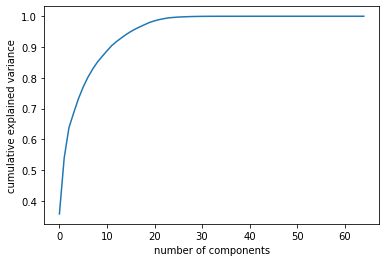

In [4]:
#pca = PCA(n_components=2) # se paso a una matiz con igula dimencion de la original.
#pca.fit(X) # ejecuta el modelo PCA y retorna las 'k' principales componentes

pca = PCA().fit(X) 
varExp = pca.explained_variance_ratio_
print(varExp.shape,'\n Explained variance',np.sum(varExp[:50]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Observaciones
* El numero de dimensiones neserarias para lograr una varianza acumulada de los datos de aprox 95% es de 10. 

In [5]:
pca = PCA(16,svd_solver='randomized') # Version rapida para calculo de la matriz de covarianza (SVD), para grandes dimensiones.
pca.fit(X)

PCA(n_components=16, svd_solver='randomized')

(400, 65)
(400, 16)
[23.29288832 11.8266081   6.42313265  3.1571243   2.98798306  2.48548249
  2.08470129  1.71928394  1.49548224  1.19129573  1.1674824   1.11053515
  0.85749551  0.75177414  0.72849749  0.63759387]


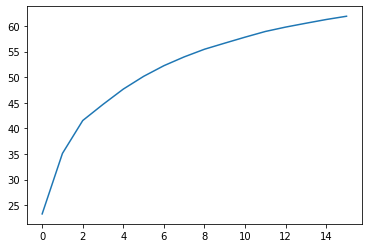

In [6]:
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)
print(pca.explained_variance_)
plt.plot(np.cumsum(pca.explained_variance_))

## Observacion
* Se observan las dimensiones que aportan mas varianza del modelo.

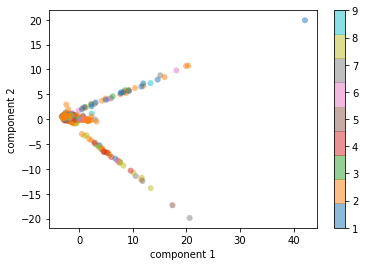

In [7]:

for i in range(400):
  if(Etiquetas[i]=="negativa"):
    Etiquetas[i]=1
  if(Etiquetas[i]=="neutral"):
    Etiquetas[i]=2
  if(Etiquetas[i]=="positiva"):
    Etiquetas[i]=3
  if(Etiquetas[i]=="Stress"):
    Etiquetas[i]=4
  if(Etiquetas[i]=="calm"):
    Etiquetas[i]=5
  if(Etiquetas[i]=="tristeza"):
    Etiquetas[i]=6
  if(Etiquetas[i]=="satisfecho"):
    Etiquetas[i]=7
  if(Etiquetas[i]=="tranquilid"):
    Etiquetas[i]=8
  if(Etiquetas[i]=="sorpresa"):
    Etiquetas[i]=9


plt.scatter(projected[:, 0], projected[:, 1], # grafica todos los puntos de la coordenada x ([:, 0]) y los puntos de la coordenada y
            c=Etiquetas, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 9)) # color map de 10 por q se que hay 10 clases
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

[0.35745625 0.5389492  0.63751958 0.68596929 0.73182334 0.76996594
 0.80195808 0.82834248 0.85129238 0.86957419 0.88749055 0.90453299
 0.91769225 0.92922909 0.94040873 0.95019334]


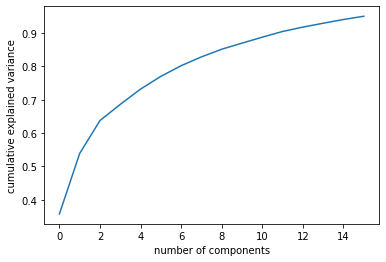

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print(np.cumsum(pca.explained_variance_ratio_))

In [9]:
#EtiquetasTrain = c
Etiquetas = dataset['EMOCIÓN']
Etiquetas = np.array(Etiquetas.values)

'''
for i in range(XTrain.shape[0]):
  if(EtiquetasTrain[i]==1.):
    EtiquetasTrain[i]="negativa"
  if(EtiquetasTrain[i]==2.):
    EtiquetasTrain[i]="neutral"
  if(EtiquetasTrain[i]==3.):
    EtiquetasTrain[i]="positiva"
  if(EtiquetasTrain[i]==4.):
    EtiquetasTrain[i]="Stress"
  if(EtiquetasTrain[i]==5.):
    EtiquetasTrain[i]="calm"
  if(EtiquetasTrain[i]==6.):
    EtiquetasTrain[i]="tristeza"
  if(EtiquetasTrain[i]==7.):
    EtiquetasTrain[i]="satisfecho"
  if(EtiquetasTrain[i]==8.):
    EtiquetasTrain[i]="tranquilidad"
  if(EtiquetasTrain[i]==9.):
    EtiquetasTrain[i]="sorpresa"

'''
import seaborn as sns
# Creamos el dataframe para seaborn
datapca = pd.DataFrame(projected)
labels  = dataset['EMOCIÓN']
datapca['EMOCIÓN'] = Etiquetas

# para compiar los nombre de las columnas a un nuevo dataframe
# newDataFrame.colums = datos.columns.vules

#g = sns.PairGrid(datapca, hue='EMOCIÓN')
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.add_legend()


In [10]:
print(projected.shape)
Recovery = pca.inverse_transform(projected)
print(Recovery.shape)

print(X.shape)

(400, 16)
(400, 65)
(400, 65)


In [11]:
datapca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,EMOCIÓN
0,-2.323832,0.042259,-2.074261,0.029075,-0.193686,3.607803,-1.681205,-2.021966,-1.464487,0.110988,-0.830793,1.169526,-0.509234,3.645592,2.665392,0.079921,neutral
1,-0.892462,-0.607589,-0.471803,-0.607310,-3.051741,3.197655,1.965205,-2.076944,-0.603762,0.796331,0.599001,0.158623,1.184330,-1.911844,-1.033234,-0.206297,positiva
2,-1.585040,-0.222709,-1.151906,2.894311,-2.298952,1.868188,-0.498739,-1.983366,-0.382252,-1.390174,-1.470203,-0.955852,0.324117,-0.451675,-0.621742,-0.774010,neutral
3,-2.724015,0.021342,-0.712303,-0.771943,-1.098730,0.272598,0.519219,-1.096608,-0.046069,-0.587158,0.332503,0.031509,-0.936655,0.171955,0.421604,0.010534,neutral
4,-2.027683,-0.278589,-0.951709,-0.639203,-1.181512,1.443502,-1.399151,-1.475979,-0.231246,-0.033897,-0.445818,-0.480376,-0.381857,0.896343,0.599226,-0.195812,positiva
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-2.734264,0.321575,-0.246636,-0.020197,-0.515100,-2.016076,0.707447,-1.110749,0.148775,-0.995862,-0.026749,-0.656889,0.569178,0.471659,-0.671823,0.003446,neutral
396,-3.057694,0.305776,-0.654241,-0.093307,-0.133533,-1.241856,-0.421874,-0.077353,-0.524259,0.205802,1.429210,0.422864,-1.283930,-0.053986,0.065730,-0.842706,neutral
397,-2.480013,0.403156,0.037875,0.295337,-0.639331,-1.771690,0.107300,0.309124,-1.233209,0.475423,1.671519,0.639242,-0.823030,-0.004206,-1.261651,0.347464,neutral
398,-2.636443,0.415935,-0.022829,0.143714,-0.849503,-2.488619,1.276231,-0.848069,-0.755163,0.098333,1.780566,-0.198017,0.090335,-0.297746,-0.139825,-0.124194,neutral


### Modelos lineales de clasificacion Bayesiano y Regresion Logıstica

In [12]:
#db = pickle.load('featS17.pkl')
#db = open('featS17.pkl','wb')

'''
filename = 'S17MIX.pkl'
#X = db['data']
#t = db['target']

infile = open(filename,'rb')
#new_dict = pickle.load(infile)
dataset = pd.DataFrame(pickle.load(infile))
infile.close()
'''

#dataset = pd.read_pickle('./S17MIX.pkl')


#dataset

"\nfilename = 'S17MIX.pkl'\n#X = db['data']\n#t = db['target']\n\ninfile = open(filename,'rb')\n#new_dict = pickle.load(infile)\ndataset = pd.DataFrame(pickle.load(infile))\ninfile.close()\n"

In [13]:

Etiquetas = dataset['EMOCIÓN']
'''
for i in range(40):
  if(Etiquetas[i]=="negativa"):
    Etiquetas[i]=1
  if(Etiquetas[i]=="neutral"):
    Etiquetas[i]=2
  if(Etiquetas[i]=="positiva"):
    Etiquetas[i]=3
  if(Etiquetas[i]=="Stress"):
    Etiquetas[i]=4
  if(Etiquetas[i]=="calm"):
    Etiquetas[i]=5
  if(Etiquetas[i]=="tristeza"):
    Etiquetas[i]=6
  if(Etiquetas[i]=="satisfecho"):
    Etiquetas[i]=7
  if(Etiquetas[i]=="tranquilid"):
    Etiquetas[i]=8
  if(Etiquetas[i]=="sorpresa"):
    Etiquetas[i]=9
'''    
Etiquetas = np.array(Etiquetas.values)

#Etiquetas.astype
#Etiquetas



In [14]:
#X =  dataset.drop(['EMOCIÓN'],axis=1)
#X = X.values
#X.shape
#Etiquetas

In [15]:
#from sklearn.preprocessing import scale
#XTrain = scale(XTrain)

'''
# Normalizamos nuestros datos
means = np.mean(XTrain, axis=0)
stds = np.std(XTrain, axis=0)
 
XTrain = (XTrain - means)/stds
XTrain = (XTrain - means)/stds

from sklearn.preprocessing import scale
XTrain = scale(XTrain)
'''

# construimos el clasificador Bayesiano
from sklearn.naive_bayes import GaussianNB

# Se crea el modelo (ej. clasificador)
model = GaussianNB() # Verificar cuales son los parametros que tiene este clasificador.
# Se entrena el modelo
model.fit(XTrain,EtiquetasTrain)
# Se realiza una predicción de las etiquetas
yEstTrain = model.predict(XTrain)

yEstTest = model.predict(XTest)

#print('Etq estimadas: \n', yEst)
#print('Etq reales: \n', EtiquetasTrain)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(EtiquetasTrain,yEstTrain))
print('Confunsion Matrix (Train): \n', confusion_matrix(EtiquetasTrain,yEstTrain))

print('Accuracy: ', accuracy_score(EtiquetasTest,yEstTest))
print('Confunsion Matrix (Test): \n', confusion_matrix(EtiquetasTest,yEstTest))

accuracy = model.score(XTrain, EtiquetasTrain)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = model.score(XTest, EtiquetasTest)
print("Test accuracy = ", accuracy * 100, "%")


Accuracy:  0.225
Confunsion Matrix (Train): 
 [[12  1  0  0  0  0  0  1  1]
 [ 1  2  0  0  0  0  4  1  2]
 [ 0  0  8  0  5  1  1  2  0]
 [10  2  9  8 30  2 38  3  2]
 [ 4  0  2  0  7  0  1  0  0]
 [ 6  4  1  2  6  2 24  0  3]
 [ 3  0  1  0  2  0 12  0  0]
 [ 5  3  0  0  1  1 13  8  1]
 [ 2  0  1  0  3  0 11  1  4]]
Accuracy:  0.03333333333333333
Confunsion Matrix (Test): 
 [[ 0  1  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 5  6 23  1 13  3 17  0  0]
 [ 0  1  2  0  1  0  1  0  0]
 [ 0  2  2  0  7  1  5  0  1]
 [ 0  0  1  1  2  0  1  0  0]
 [ 0  0  0  0  5  0  3  0  0]
 [ 0  1  1  0  4  2  3  0  0]]
Train accuracy =  22.5 %
Test accuracy =  3.3333333333333335 %


## Observacion
* Al entrenar el modelo y aumentar en numero de observaciones con el modelo Bayesiano el accuracy de entrenamiento dacae bruscamente.

In [16]:
#from sklearn.preprocessing import scale
#X = scale(X)

from  sklearn.linear_model import LogisticRegression
# Se crea el modelo (ej. clasificador)
modelRL = LogisticRegression()
# Se entrena el modelo
modelRL.fit(XTrain,EtiquetasTrain)
# Se realiza una predicción
yEstTrain = modelRL.predict(XTrain)
yEstTest = modelRL.predict(XTest)


# Evaluación del rendimiento
#print('Etq estimadas: ', yEst)
#print('Etq reales: ', EtiquetasTrain)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(EtiquetasTrain,yEstTrain))
print('Confunsion Matrix (Train): \n', confusion_matrix(EtiquetasTrain,yEstTrain))

print('Accuracy: ', accuracy_score(EtiquetasTest,yEstTest))
print('Confunsion Matrix (Test): \n', confusion_matrix(EtiquetasTest,yEstTest))


accuracy = modelRL.score(XTrain, EtiquetasTrain)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = modelRL.score(XTest, EtiquetasTest)
print("Test accuracy = ", accuracy * 100, "%")

from sklearn.metrics import confusion_matrix
EtqTest = modelRL.predict(XTest)
cMAT = confusion_matrix(EtiquetasTest,EtqTest)
cMAT.view()


Accuracy:  0.5107142857142857
Confunsion Matrix (Train): 
 [[ 7  0  0  3  0  1  2  1  1]
 [ 0  2  0  2  0  3  0  2  1]
 [ 0  0  8  6  0  0  0  2  1]
 [ 4  1  3 83  0 10  0  3  0]
 [ 2  0  0  6  6  0  0  0  0]
 [ 3  0  0 23  1 15  1  2  3]
 [ 2  0  1  4  0  1  9  0  1]
 [ 0  1  0 18  0  3  0 10  0]
 [ 0  0  2 12  0  3  1  1  3]]
Accuracy:  0.2916666666666667
Confunsion Matrix (Test): 
 [[ 0  0  0  1  1  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0]
 [ 0  0  3 25  2 36  0  2  0]
 [ 0  0  0  0  1  4  0  0  0]
 [ 1  0  0  7  0  9  0  0  1]
 [ 0  0  1  0  1  3  0  0  0]
 [ 0  0  0  6  0  1  0  0  1]
 [ 0  0  0  4  0  4  0  3  0]]
Train accuracy =  51.07142857142857 %
Test accuracy =  29.166666666666668 %


C:\Users\jazd1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0,  0,  0,  1,  1,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  3, 25,  2, 36,  0,  2,  0],
       [ 0,  0,  0,  0,  1,  4,  0,  0,  0],
       [ 1,  0,  0,  7,  0,  9,  0,  0,  1],
       [ 0,  0,  1,  0,  1,  3,  0,  0,  0],
       [ 0,  0,  0,  6,  0,  1,  0,  0,  1],
       [ 0,  0,  0,  4,  0,  4,  0,  3,  0]], dtype=int64)

### Utilizando la forma de particion de conjunto de entrenamiento y test aleatorio

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_Train, X_Test, Etiquetas_Train, Etiquetas_Test = train_test_split(X,Etiquetas,test_size = 0.2) 

model = LogisticRegression()
# Se le envían a la fase de entrenamiento el Xtrain ytrain
model.fit(X_Train,Etiquetas_Train)

from sklearn.metrics import confusion_matrix, accuracy_score
EtqTest = model.predict(X_Test)
cMAT = confusion_matrix(Etiquetas_Test,EtqTest)
cMAT.view()

accuracy = model.score(X_Train, Etiquetas_Train)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = model.score(X_Test, Etiquetas_Test)
print("Test accuracy = ", accuracy * 100, "%")

print('ACC test: ',accuracy_score(Etiquetas_Test,EtqTest))

Train accuracy =  53.125 %
Test accuracy =  35.0 %
ACC test:  0.35


C:\Users\jazd1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Ahora se procede a realizar el entrenamiento con los datos generados al usar el modelo PCA para comparar si al pasar a un espacio latente de menor dimensionalidad que el problema original se pierde o se disminuye la certeza en los modelos de clasificación probabilísticos.

In [19]:
XPCA0 = projected[:40]
XPCA1 = projected[40:80]
XPCA2 = projected[80:120]
XPCA3 = projected[120:160]
XPCA4 = projected[160:200]
XPCA5 = projected[200:240]
XPCA6 = projected[240:280]
XPCA7 = projected[280:320]
XPCA8 = projected[320:360]
XPCA9 = projected[360:400]

w = np.concatenate((XPCA0,XPCA2,XPCA3,XPCA4,XPCA5,XPCA8,XPCA9), axis = 0)  
x = np.concatenate((XPCA1,XPCA6,XPCA7), axis = 0)  

#XTrain = X[:a] 
XTrainPCA = w
XTestPCA = x



In [20]:
# construimos el clasificador Bayesiano
from sklearn.naive_bayes import GaussianNB

# Se crea el modelo (ej. clasificador)
model = GaussianNB() # Verificar cuales son los parametros que tiene este clasificador.
# Se entrena el modelo
model.fit(XTrainPCA,EtiquetasTrain)
# Se realiza una predicción de las etiquetas
yEstTrain = model.predict(XTrainPCA)
yEstTest = model.predict(XTestPCA)

##############################################################################################################################

#print('Etq estimadas: \n', yEst)
#print('Etq reales: \n', EtiquetasTrain)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(EtiquetasTrain,yEstTrain))
print('Confunsion Matrix (Train): \n', confusion_matrix(EtiquetasTrain,yEstTrain))

print('Accuracy: ', accuracy_score(EtiquetasTest,yEstTest))
print('Confunsion Matrix (Test): \n', confusion_matrix(EtiquetasTest,yEstTest))


#EtqTest = model.predict(XTestPCA)  ----------------------> No da por ???
#cMAT = confusion_matrix(EtiquetasTest,EtqTest)
#cMAT.view()

accuracy = model.score(XTrainPCA, EtiquetasTrain)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = model.score(XTestPCA, EtiquetasTest)
print("Test accuracy = ", accuracy * 100, "%")

Accuracy:  0.35714285714285715
Confunsion Matrix (Train): 
 [[ 8  0  1  1  0  0  0  4  1]
 [ 0  3  0  1  0  3  0  2  1]
 [ 0  0 14  0  0  2  0  1  0]
 [10  1 14 37  5  5  5 15 12]
 [ 3  0  3  4  4  0  0  0  0]
 [ 6  3  3  6  4  9  2  4 11]
 [ 4  0  1  4  0  0  7  1  1]
 [ 3  2  6  9  0  0  1  8  3]
 [ 2  0  5  0  1  2  1  1 10]]
Accuracy:  0.075
Confunsion Matrix (Test): 
 [[ 0  1  0  2  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0]
 [ 0 28 10  8  1  9  0  2 10]
 [ 0  3  1  1  0  0  0  0  0]
 [ 0  4  1  1  1  1  0  2  8]
 [ 0  1  1  2  0  1  0  0  0]
 [ 0  0  2  1  1  1  1  0  2]
 [ 0  2  3  2  0  4  0  0  0]]
Train accuracy =  35.714285714285715 %
Test accuracy =  7.5 %


In [21]:
from  sklearn.linear_model import LogisticRegression

# Se crea el modelo (ej. clasificador)
modelRL = LogisticRegression()
# Se entrena el modelo
modelRL.fit(XTrainPCA,EtiquetasTrain)
# Se realiza una predicción
yEstTrain = modelRL.predict(XTrainPCA)
yEstTest = modelRL.predict(XTestPCA)

# Evaluación del rendimiento
#print('Etq estimadas: ', yEst)
#print('Etq reales: ', EtiquetasTrain)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(EtiquetasTrain,yEstTrain))
#print('Confunsion Matrix (Train): \n', confusion_matrix(EtiquetasTrain,yEst))
print('Accuracy: ', accuracy_score(EtiquetasTest,yEstTest))
#print('Confunsion Matrix (Test): \n', confusion_matrix(EtiquetasTest,yEstTest))


EtqTest = modelRL.predict(XTestPCA)
cMAT = confusion_matrix(EtiquetasTest,EtqTest)
cMAT.view()

accuracy = modelRL.score(XTrainPCA, EtiquetasTrain)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = modelRL.score(XTestPCA, EtiquetasTest)
print("Test accuracy = ", accuracy * 100, "%")

print('ACC test: ',accuracy_score(EtiquetasTest,EtqTest))



Accuracy:  0.45
Accuracy:  0.2916666666666667
Train accuracy =  45.0 %
Test accuracy =  29.166666666666668 %
ACC test:  0.2916666666666667


C:\Users\jazd1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Ahora con el SPLIT aleatorio y PCA

In [22]:
X_Train, X_Test, Etiquetas_Train, Etiquetas_Test = train_test_split(projected,Etiquetas,test_size = 0.2) 

model = LogisticRegression()
# Se le envían a la fase de entrenamiento el Xtrain ytrain
model.fit(X_Train,Etiquetas_Train)

from sklearn.metrics import confusion_matrix, accuracy_score
EtqTest = model.predict(X_Test)
cMAT = confusion_matrix(Etiquetas_Test,EtqTest)
cMAT.view()

accuracy = model.score(X_Train, Etiquetas_Train)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = model.score(X_Test, Etiquetas_Test)
print("Test accuracy = ", accuracy * 100, "%")

print('ACC test: ',accuracy_score(Etiquetas_Test,EtqTest))

Train accuracy =  50.9375 %
Test accuracy =  33.75 %
ACC test:  0.3375


C:\Users\jazd1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2. Base de datos de rostros

In [43]:
from sklearn.datasets import fetch_lfw_people # base de datos muy interesante con 5749 clases, 13233 observaciones, dimensionalidad de 5828
faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data
Etiquetas = faces.target
print(faces.target_names)
print(faces.images.shape)

faces

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


{'data': array([[138.        , 135.66667   , 127.666664  , ...,   1.6666666 ,
           1.6666666 ,   0.33333334],
        [ 71.333336  ,  56.        ,  67.666664  , ..., 247.66667   ,
         243.        , 238.33333   ],
        [ 84.333336  ,  97.333336  ,  72.333336  , ..., 114.        ,
         194.33333   , 241.        ],
        ...,
        [ 29.333334  ,  29.        ,  29.333334  , ..., 145.        ,
         147.        , 141.66667   ],
        [ 49.333332  ,  55.666668  ,  76.666664  , ..., 186.33333   ,
         176.33333   , 161.        ],
        [ 31.        ,  26.333334  ,  28.        , ...,  34.        ,
          42.        ,  69.666664  ]], dtype=float32),
 'images': array([[[138.        , 135.66667   , 127.666664  , ...,  69.        ,
           68.333336  ,  67.333336  ],
         [146.        , 139.33333   , 125.        , ...,  68.333336  ,
           67.666664  ,  67.333336  ],
         [150.        , 138.33333   , 124.333336  , ...,  68.333336  ,
           67

(1348,) 
 Explained variance 0.95024604


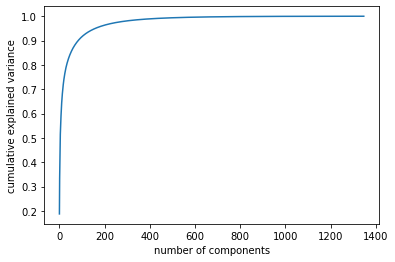

In [36]:
pca = PCA().fit(X) 
varExp = pca.explained_variance_ratio_
print(varExp.shape,'\n Explained variance',np.sum(varExp[:160]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [37]:
pca = PCA(160,svd_solver='randomized') # Version rapida para calculo de la matriz de covarianza (SVD), para grandes dimensiones.
pca.fit(X)

PCA(n_components=160, svd_solver='randomized')

(1348, 2914)
(1348, 160)
[784936.4    608064.5    296716.6    251954.53   210630.56   122705.83
 103192.266   85577.91    82269.484   79043.91    65244.934   61428.77
  50753.52    45792.246   43579.934   40619.87    37896.887   36650.43
  33977.82    29450.678   28537.072   27075.281   25220.291   24171.174
  22243.451   21759.594   20896.242   19911.104   18907.486   17769.562
  16931.986   15883.302   15038.847   14662.885   14535.64    13576.848
  13142.031   12975.39    12858.276   12115.955   11810.447   11481.815
  11400.754   10864.252   10303.248    9954.476    9822.592    9675.32
   9497.66     9270.455    8799.688    8600.325    8483.278    8385.232
   8180.628    8167.1753   7860.561    7637.7876   7384.061    7349.086
   7310.247    6950.5923   6741.0483   6626.5093   6543.365    6389.1953
   6267.933    6106.3696   6070.6475   5894.199    5872.4077   5700.8267
   5688.616    5500.611    5402.343    5247.3296   5221.3057   5144.2554
   5043.0317   4963.5083   4906.666    4

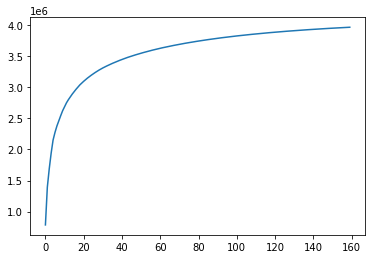

In [38]:
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)
print(pca.explained_variance_)
plt.plot(np.cumsum(pca.explained_variance_))

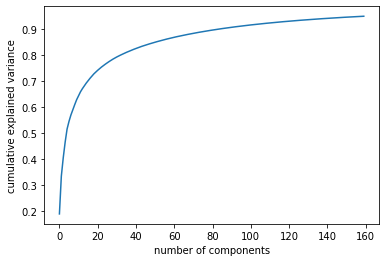

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

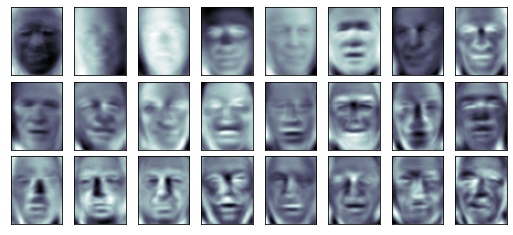

In [28]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

In [39]:
components = pca.transform(X)
projected = pca.inverse_transform(components)

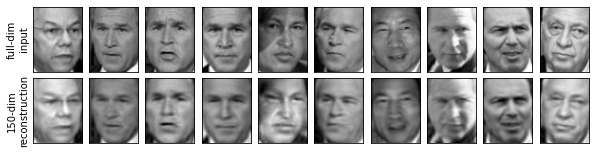

In [30]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

In [31]:
print(X.shape)
print(Etiquetas.shape)

(1348, 2914)
(1348,)


In [40]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
X_Train, X_Test, Etiquetas_Train, Etiquetas_Test = train_test_split(projected,Etiquetas,test_size = 0.2) 



# Se crea el modelo (ej. clasificador)
model = GaussianNB() # Verificar cuales son los parametros que tiene este clasificador.
# Se entrena el modelo
model.fit(X_Train,Etiquetas_Train)
# Se realiza una predicción de las etiquetas
yEst = model.predict(X_Test)

##############################################################################################################################

#print('Etq estimadas: \n', yEst)
#print('Etq reales: \n', Etiquetas)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy (Test): ', accuracy_score(Etiquetas_Test,yEst))
print('Confunsion Matrix (Test): \n', confusion_matrix(Etiquetas_Test,yEst))

accuracy = model.score(X_Train, Etiquetas_Train)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = model.score(X_Test, Etiquetas_Test)
print("Test accuracy = ", accuracy * 100, "%")

Accuracy (Test):  0.43703703703703706
Confunsion Matrix (Test): 
 [[ 9  3  5  2  0  0  1  1]
 [ 1 23  5  2  0  2  7  5]
 [ 2  5  8  0  1  1  2  2]
 [ 2 13  0 46  5 14 13 13]
 [ 0  2  2  0  2  4  1  6]
 [ 0  1  0  0  0  5  1  3]
 [ 0  0  0  0  0  4  8  1]
 [ 2  3  0  1  6  4  4 17]]
Train accuracy =  48.97959183673469 %
Test accuracy =  43.7037037037037 %


In [33]:
from  sklearn.linear_model import LogisticRegression
# Se crea el modelo (ej. clasificador)
modelRL = LogisticRegression()
# Se entrena el modelo
modelRL.fit(X_Train, Etiquetas_Train)
# Se realiza una predicción
yEst = modelRL.predict(X_Test)

# Evaluación del rendimiento
#print('Etq estimadas: ', yEst)
#print('Etq reales: ', Etiquetas_Train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy (Test): ', accuracy_score(Etiquetas_Test,yEst))
print('Confunsion Matrix (Train): \n', confusion_matrix(Etiquetas_Test,yEst))

EtqTest = modelRL.predict(X_Test)
cMAT = confusion_matrix(Etiquetas_Test,EtqTest)
cMAT.view()

accuracy = modelRL.score(X_Train, Etiquetas_Train)
print("Train accuracy = ", accuracy * 100, "%")
accuracy = modelRL.score(X_Test, Etiquetas_Test)
print("Test accuracy = ", accuracy * 100, "%")

print('ACC test: ',accuracy_score(Etiquetas_Test,EtqTest))

C:\Users\jazd1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Test):  0.8148148148148148
Confunsion Matrix (Train): 
 [[10  2  2  0  1  0  0  0]
 [ 1 39  0  6  2  1  0  1]
 [ 1  0 18  3  0  1  0  0]
 [ 0  2  0 86  2  0  0  1]
 [ 0  1  2  2 17  0  0  1]
 [ 0  0  0  2  1 17  0  0]
 [ 0  1  0  0  0  0 12  0]
 [ 0  3  0  6  5  0  0 21]]
Train accuracy =  96.93877551020408 %
Test accuracy =  81.48148148148148 %
ACC test:  0.8148148148148148
